In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from libs.modul_encoding import LabelEncoder
from libs.modul_split_data import train_test_split, KFold
from libs.modul_decision_tree import DecisionTreeClassifier
from libs.modul_metrics import accuracy_score, classification_report, cross_val_score
from libs.modul_visualization import ManualTreeVisualizer

In [15]:
df = pd.read_csv('dataset/crop_recomend.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
feature_names = df.columns[:-1].tolist() 
X = df.iloc[:, :-1].values
y_raw = df['label'].values

In [23]:
encoder = LabelEncoder()
y = encoder.fit_transform(y_raw)

print(f"Jumlah Kelas Tanaman: {len(encoder.classes_)}")
print(f"Contoh Kelas: {encoder.classes_[:5]}")

Jumlah Kelas Tanaman: 22
Contoh Kelas: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Jumlah Data Training: {len(X_train)} sampel")
print(f"Jumlah Data Testing:  {len(X_test)} sampel")

Jumlah Data Training: 1760 sampel
Jumlah Data Testing:  440 sampel


In [39]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=12,          
    min_samples_split=5,
    min_samples_leaf=2
)

print("Sedang melakukan 5-Fold Cross Validation...")
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print(f"CV Scores per fold: {cv_scores}")
print(f"Rata-rata Akurasi CV: {np.mean(cv_scores) * 100:.2f}%")


clf.fit(X_train, y_train)
print("Model berhasil dilatih!")

Sedang melakukan 5-Fold Cross Validation...
CV Scores per fold: [0.96022727 0.95170455 0.96590909 0.97159091 0.97727273]
Rata-rata Akurasi CV: 96.53%
Model berhasil dilatih!


In [31]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada Data Test: {accuracy * 100:.2f}%\n")


report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(report)

Akurasi pada Data Test: 98.18%

              precision     recall   f1-score    support

       apple       1.00       1.00       1.00         20
      banana       1.00       1.00       1.00         20
   blackgram       0.95       0.90       0.92         20
    chickpea       1.00       1.00       1.00         20
     coconut       1.00       1.00       1.00         20
      coffee       1.00       1.00       1.00         20
      cotton       1.00       1.00       1.00         20
      grapes       1.00       1.00       1.00         20
        jute       0.95       0.95       0.95         20
 kidneybeans       1.00       0.95       0.97         20
      lentil       0.95       1.00       0.98         20
       maize       1.00       0.95       0.97         20
       mango       1.00       1.00       1.00         20
   mothbeans       0.86       0.90       0.88         20
    mungbean       1.00       1.00       1.00         20
   muskmelon       1.00       1.00       1.00         2

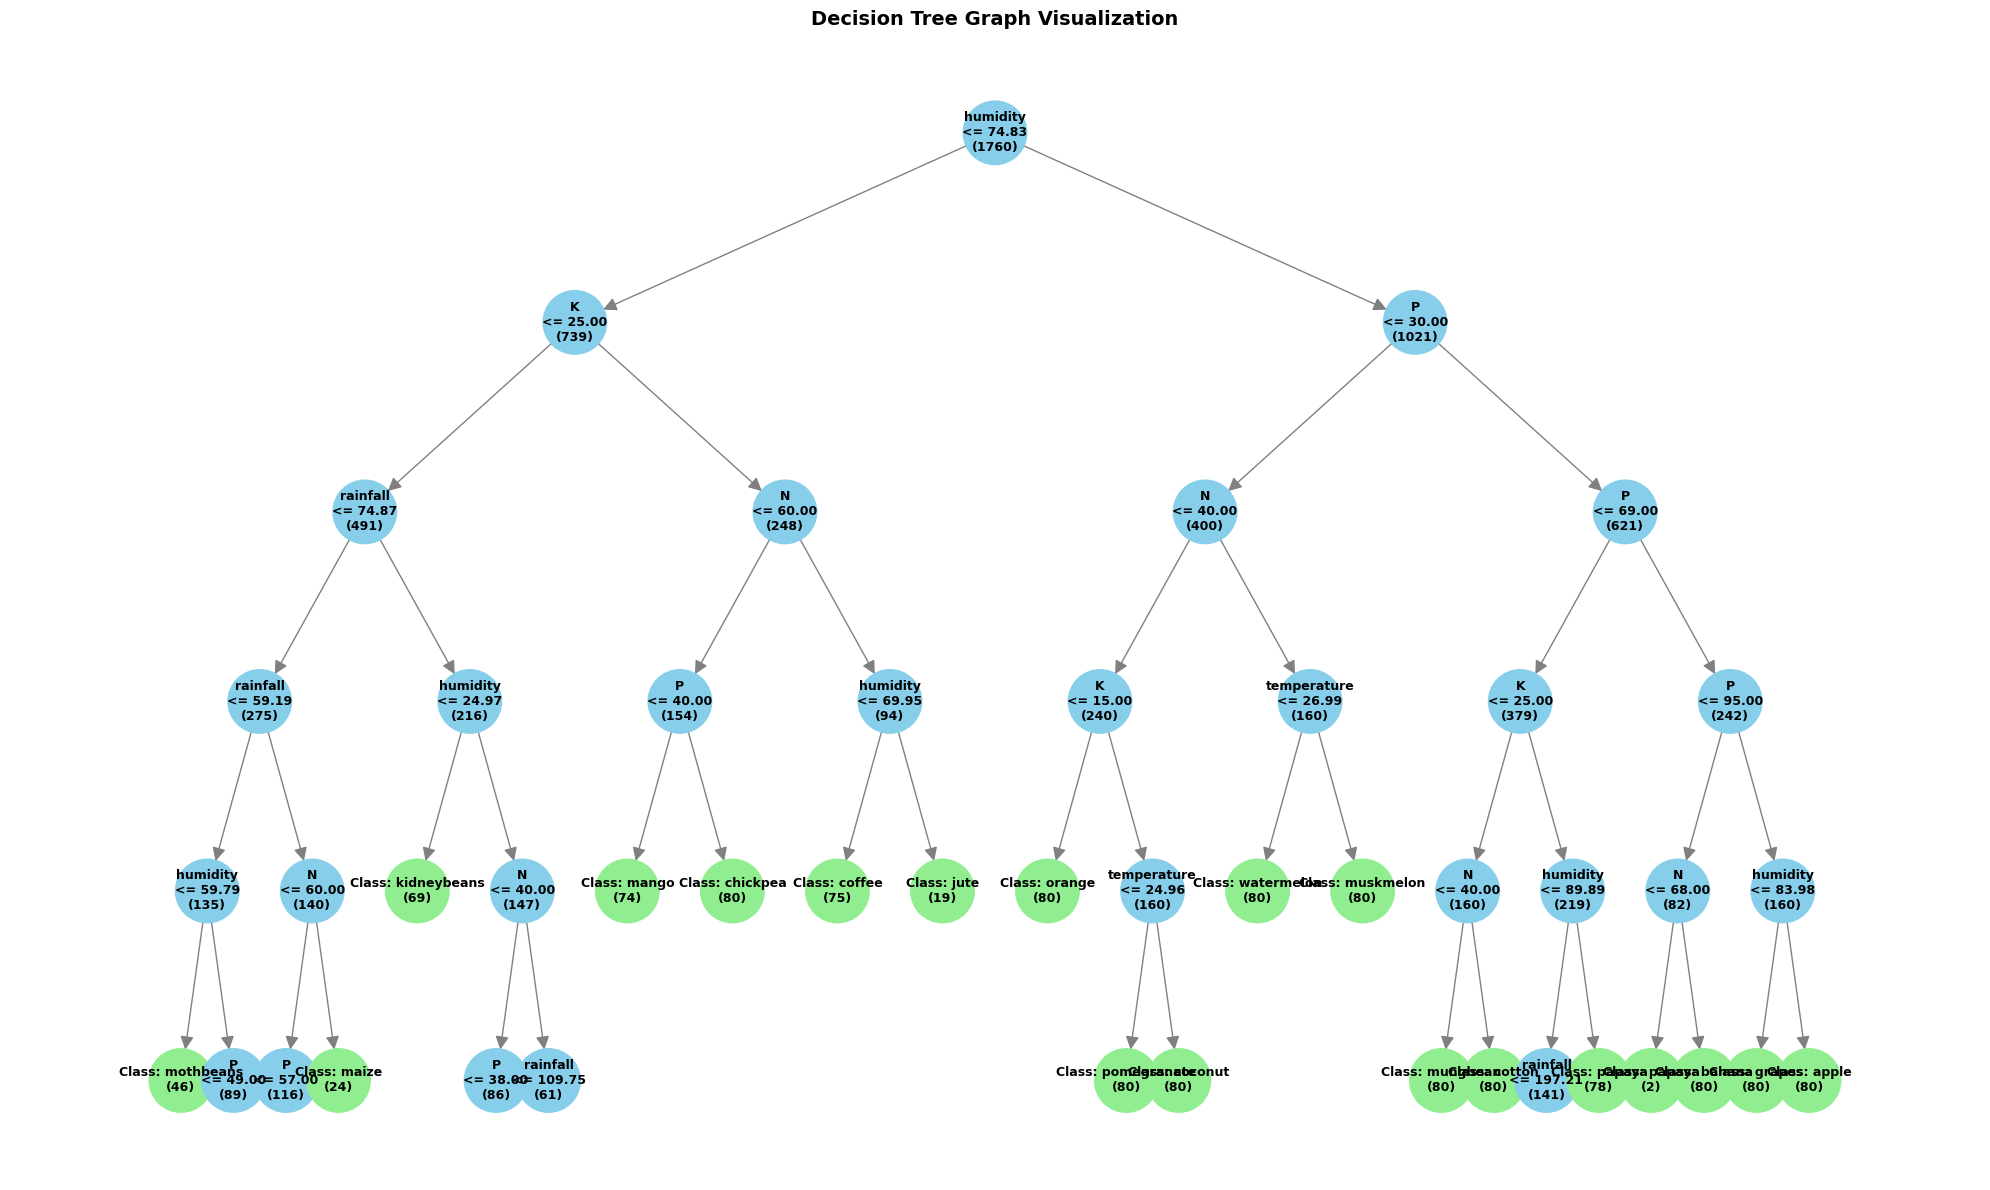

Fitur yang paling sering digunakan untuk membedakan tanaman:


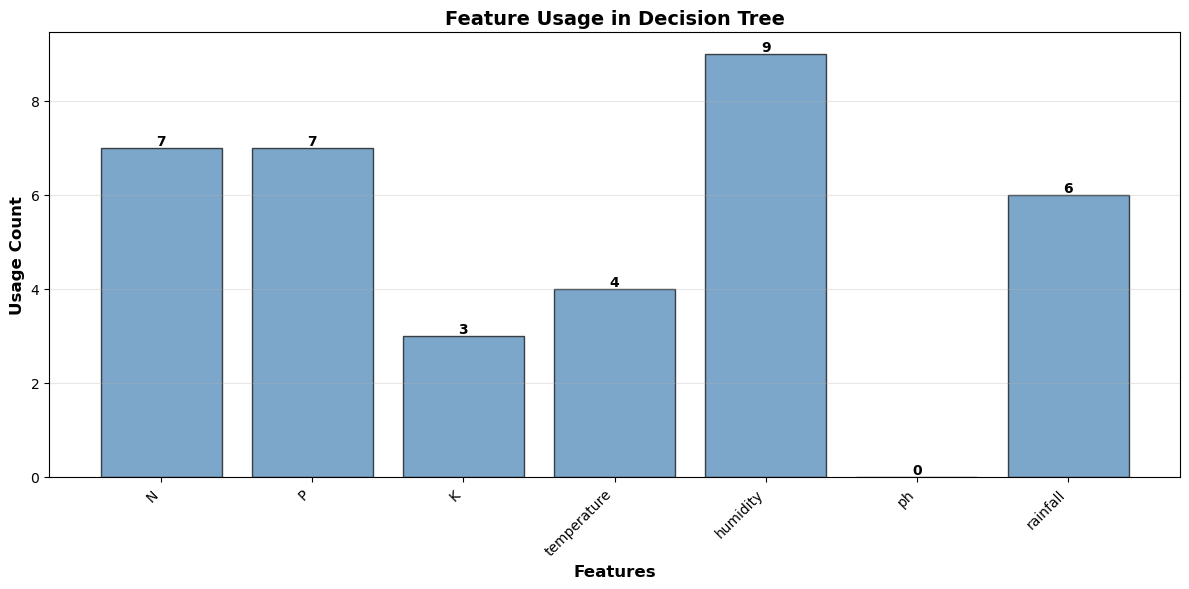


Menelusuri keputusan untuk tanaman: orange


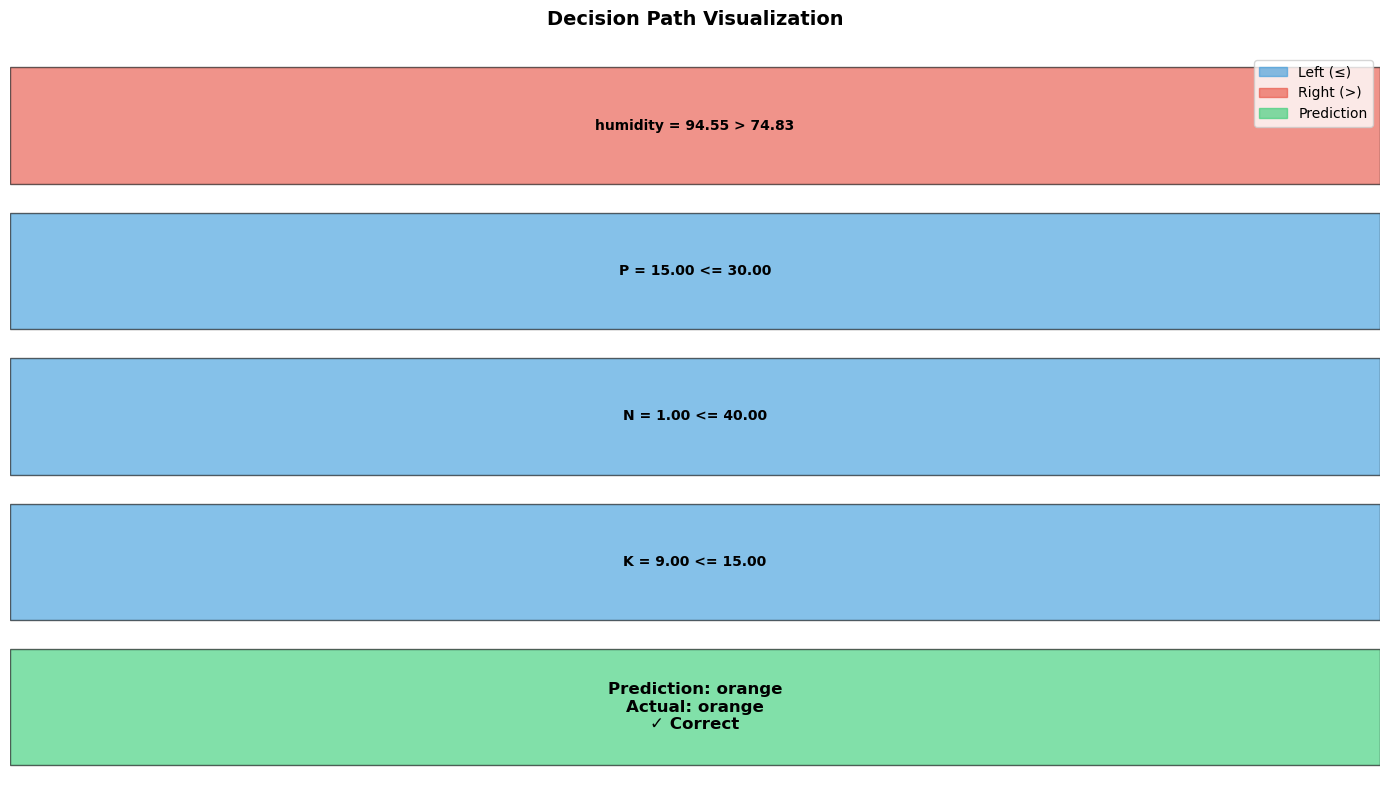

In [ ]:
viz = ManualTreeVisualizer(
    tree_model=clf,
    feature_names=feature_names,
    class_names=encoder.classes_
)

fig_tree = viz.plot_tree_graph(X_train, y_train, figsize=(20, 12), max_depth=5)
plt.show()

print("Fitur yang paling sering digunakan untuk membedakan tanaman:")
fig1 = viz.plot_feature_usage(figsize=(12, 6))
plt.show()

sample_idx = 0 
sample_data = X_test[sample_idx]
actual_label = y_test[sample_idx]

print(f"\nMenelusuri keputusan untuk tanaman: {encoder.classes_[actual_label]}")
fig2 = viz.plot_decision_paths(sample_data, actual_label, figsize=(14, 8))
plt.show()

